In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Импортируем данные

In [2]:
data = pd.read_csv('glass.csv')

In [3]:
data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

## Тут видно что у нас 7 классов

In [353]:
data1 = data.sample(214)

In [354]:
data1

RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
81   1.51593  13.25  3.45  1.43  73.17  0.61   7.86  0.00  0.00     2
183  1.51969  14.56  0.00  0.56  73.48  0.00  11.22  0.00  0.00     6
198  1.51531  14.38  0.00  2.66  73.10  0.04   9.08  0.64  0.00     7
58   1.51754  13.48  3.74  1.17  72.99  0.59   8.03  0.00  0.00     1
64   1.52172  13.48  3.74  0.90  72.01  0.18   9.61  0.00  0.07     1
..       ...    ...   ...   ...    ...   ...    ...   ...   ...   ...
141  1.51851  13.20  3.63  1.07  72.83  0.57   8.41  0.09  0.17     2
44   1.51786  12.73  3.43  1.19  72.95  0.62   8.76  0.00  0.30     1
24   1.51720  13.38  3.50  1.15  72.85  0.50   8.43  0.00  0.00     1
117  1.51708  13.72  3.68  1.81  72.06  0.64   7.88  0.00  0.00     2
153  1.51610  13.42  3.40  1.22  72.69  0.59   8.32  0.00  0.00     3

[214 rows x 10 columns]

# Размер

In [5]:
data.shape

(214, 10)

# Название столбцов

In [6]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

# Тут видно что все данные числовые, что значительно упрощает задачу подготовки данных

In [146]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Тут приведены все важные статистические значения

In [148]:
data.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

# Из таблицы корреляции видно что Ca довольно сильно коррелирует с Rl

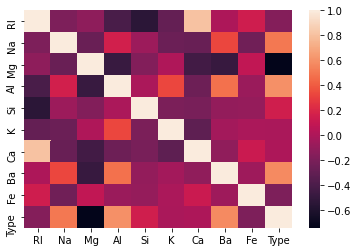

In [9]:
data_corr = data.corr()
sns.heatmap(data_corr)

In [154]:
data.corr()['Ca']['RI']

0.8104026963400868

# Ниже представлена визуализация данных из 'Type'

In [11]:
fig = go.Figure(data=[go.Pie(labels=data['Type'])])
fig.show()

In [336]:
fig = px.bar(data, x = "Type")
fig.show()

# Пустые значения

In [12]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Далее представлены распределения всех переменных

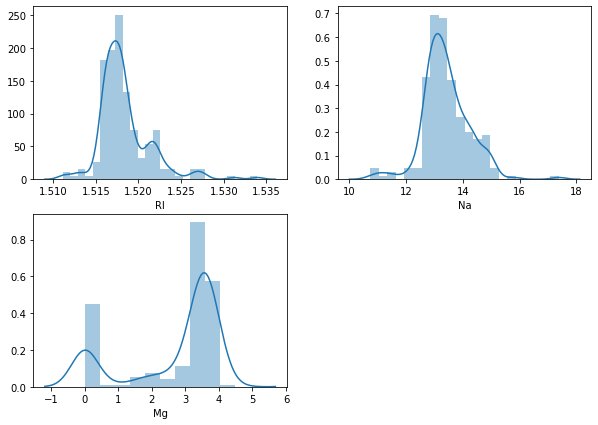

In [16]:
plt.figure(figsize = (10, 7))
plt.subplot(2, 2, 1)
sns.distplot(data.RI)
plt.subplot(2, 2, 2)
sns.distplot(data.Na)
plt.subplot(2, 2, 3)
sns.distplot(data.Mg)

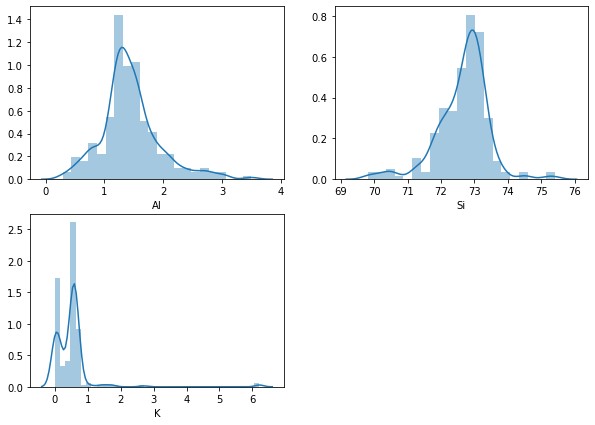

In [17]:
plt.figure(figsize = (10, 7))
plt.subplot(2, 2, 1)
sns.distplot(data.Al)
plt.subplot(2, 2, 2)
sns.distplot(data.Si)
plt.subplot(2, 2, 3)
sns.distplot(data.K)

C:\Users\mayat\anaconda3.1\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



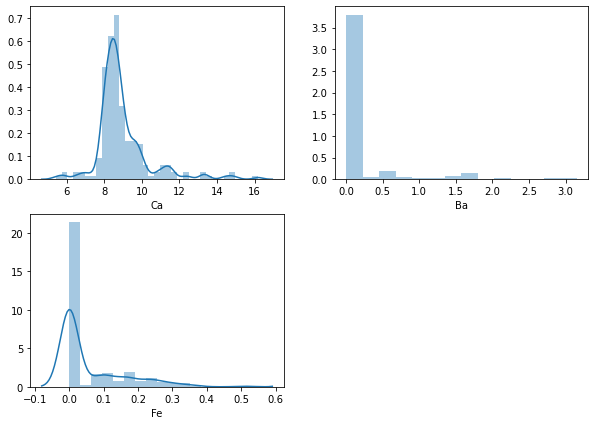

In [18]:
plt.figure(figsize = (10, 7))
plt.subplot(2, 2, 1)
sns.distplot(data.Ca)
plt.subplot(2, 2, 2)
sns.distplot(data.Ba)
plt.subplot(2, 2, 3)
sns.distplot(data.Fe)


In [15]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

# Построение классификатора

In [355]:
from sklearn.model_selection import train_test_split
X = data1.drop(columns = {'Type'})
Y = np.array(data1['Type'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = True)

In [370]:
from sklearn.model_selection import GridSearchCV
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(forestmodel, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [371]:
from sklearn.ensemble import RandomForestClassifier
forestmodel = RandomForestClassifier(n_estimators=50, max_depth = 9, min_samples_leaf = 1, min_samples_split = 2)

In [372]:
forestmodel.fit(X_train, y_train)
estimator = forestmodel.estimators_[7]

In [373]:
y_predforest = forestmodel.predict(X_test)

In [374]:
from sklearn import metrics

In [375]:
metrics.accuracy_score(y_test, y_predforest)

0.813953488372093

In [376]:
metrics.confusion_matrix(y_test, y_predforest)

array([[ 8,  1,  0,  0,  0,  0],
       [ 1, 15,  0,  0,  0,  1],
       [ 0,  3,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 1,  1,  0,  0,  0,  6]], dtype=int64)

In [377]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predforest))

              precision    recall  f1-score   support

           1       0.80      0.89      0.84         9
           2       0.75      0.88      0.81        17
           3       1.00      0.25      0.40         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.86      0.75      0.80         8

    accuracy                           0.81        43
   macro avg       0.90      0.80      0.81        43
weighted avg       0.83      0.81      0.80        43



In [279]:
feature_names = [i for i in data.drop(columns = {'Type'}).columns]

In [58]:
y_train_str = data['Type'].astype('str')
y_train_str = y_train_str.values

In [60]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='tree1.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                precision = 7, filled = True)

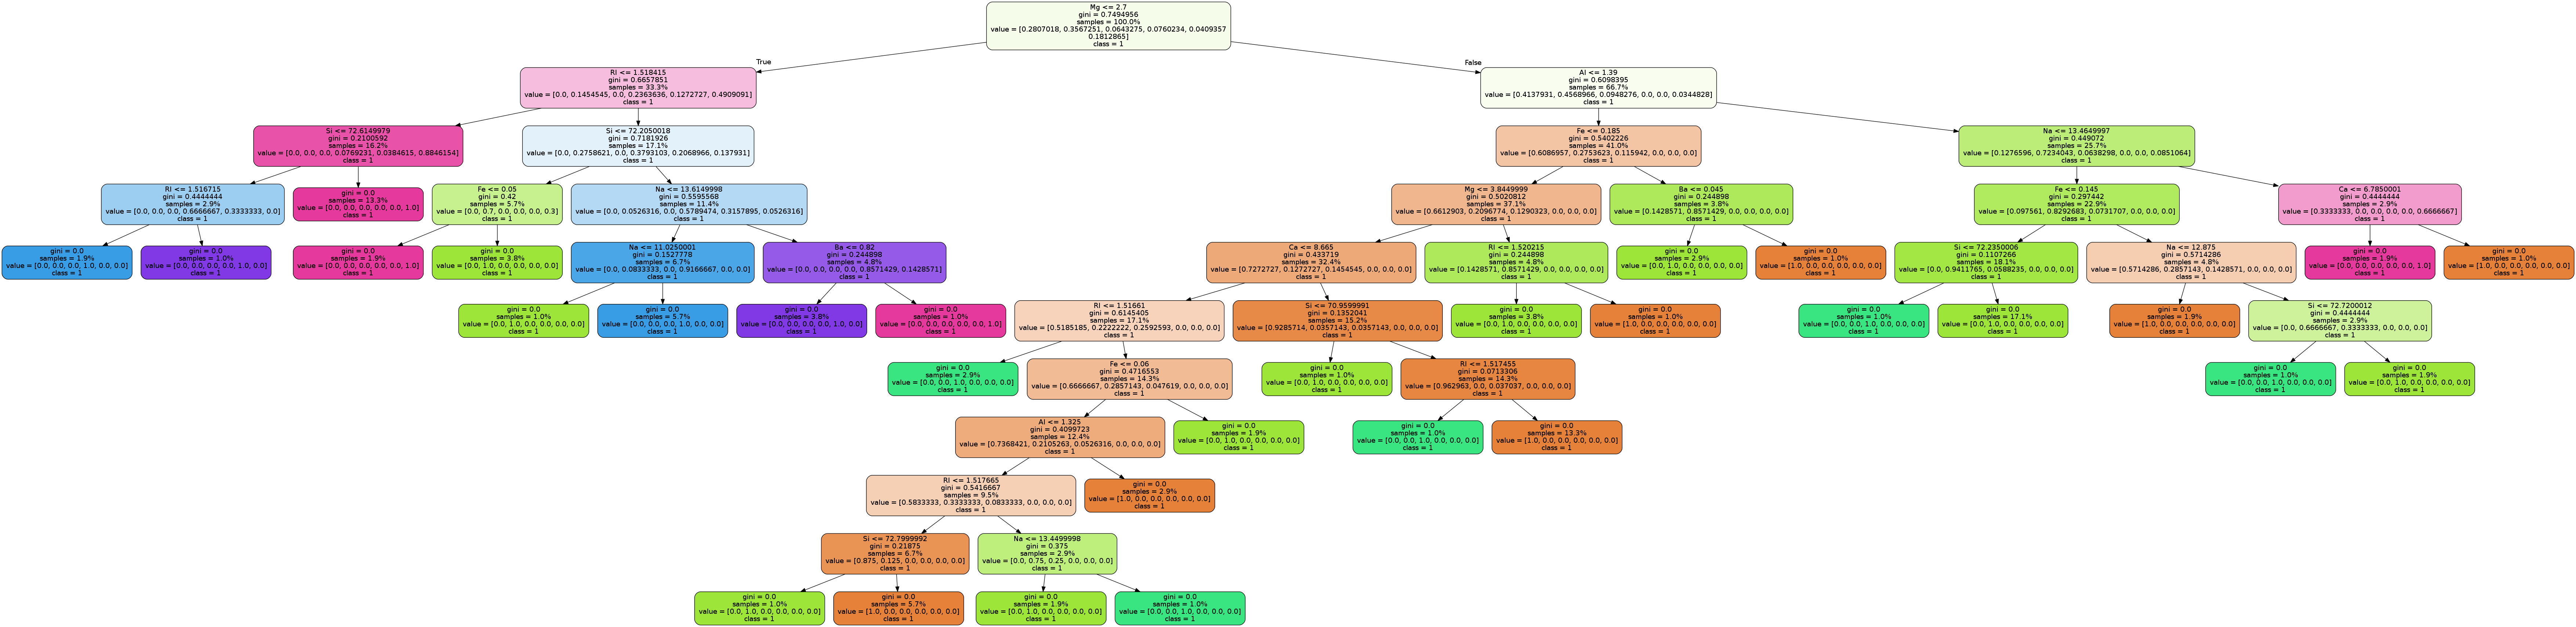

In [61]:
from IPython.display import Image
Image(filename = 'tree1_1_.png')

# Оптимизация гиперпараметров и уличшение модели

In [386]:
forestmodel = RandomForestClassifier(n_estimators=20)

In [387]:
forestmodel.fit(X_train, y_train)
estimator = forestmodel.estimators_[7]

In [388]:
y_predforest_v1 = forestmodel.predict(X_test)

In [394]:
metrics.accuracy_score(y_test, y_predforest_v1)

0.7906976744186046

In [395]:
metrics.confusion_matrix(y_test, y_predforest_v1)

array([[ 7,  2,  0,  0,  0,  0],
       [ 1, 15,  0,  0,  0,  1],
       [ 2,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 1,  1,  0,  0,  0,  6]], dtype=int64)

In [396]:
print(classification_report(y_test, y_predforest_v1))

              precision    recall  f1-score   support

           1       0.64      0.78      0.70         9
           2       0.79      0.88      0.83        17
           3       1.00      0.25      0.40         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.86      0.75      0.80         8

    accuracy                           0.79        43
   macro avg       0.88      0.78      0.79        43
weighted avg       0.81      0.79      0.78        43

